<a href="https://colab.research.google.com/github/nasirtitech/Pandas-Data-Science-Tasks/blob/master/Predict_fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Use seaborn for pairplot
!pip install -q seaborn

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#make numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


## The auto MPG dataset

In [6]:
#download and import data using pandas
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [28]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Clean data

In [29]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [30]:
dataset = dataset.dropna()

In [19]:
print(dataset['Origin'].head())

0    1
1    1
2    1
3    1
4    1
Name: Origin, dtype: int64


In [12]:
# # convert the categorical data into numeric
# categorical_colums = ['Origin']

# feature_columns = []
# for feature_name in categorical_colums:
#   vocabulary = dataset.feature_name.unique()
#   feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

# print(feature_columns)


In [31]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [32]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='' )
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## split the data into train and test

In [33]:
train_dataset = dataset.sample(frac=0.8, random_state=0)

test_dataset = dataset.drop(train_dataset.index)

## Inspect the data

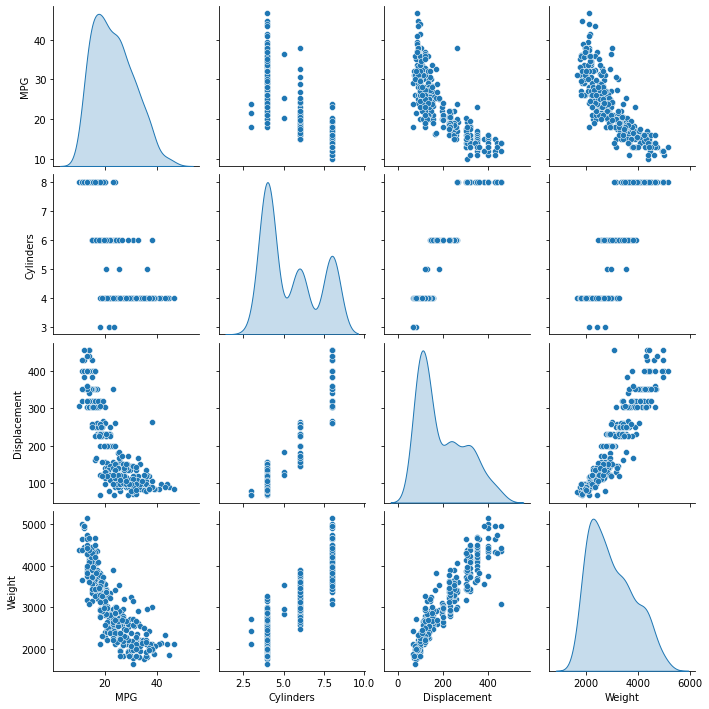

In [23]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [24]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


## Split features from labels

In [34]:
train_features  =train_dataset.copy()
test_features = test_dataset.copy()

print(train_features.columns)

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

print(train_features.columns)


Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')
Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')


In [27]:
print(train_features.columns)
print(train_labels.tail())

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, dtype: float64


## Normalization

In [35]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [36]:
#Create the normalizer layer
normalizer = preprocessing.Normalization()

In [37]:
# .adapt() it to the data
normalizer.adapt(np.array(train_features))

In [38]:
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [39]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


## Linear regression

In [45]:
# first create the hoursepower normalization layer
hoursepower = np.array(train_features['Horsepower'])

hoursepower_normalizer = preprocessing.Normalization(input_shape=[1,])
hoursepower_normalizer.adapt(hoursepower)

In [46]:
# Build the sequential model
hoursepower_model = tf.keras.Sequential([
    hoursepower_normalizer,
    layers.Dense(units=1)
    ])

hoursepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [47]:
hoursepower_model.predict(hoursepower[:10])

array([[ 0.272],
       [ 0.154],
       [-0.502],
       [ 0.381],
       [ 0.345],
       [ 0.135],
       [ 0.409],
       [ 0.345],
       [ 0.09 ],
       [ 0.154]], dtype=float32)

In [51]:
#compile the model
hoursepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', 
    #metrics = ['accuracy']
)

In [63]:
# Once the training is configured, use Model.fit() to execute the training:
%%time
history = hoursepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs = 100,
    #suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.52 s, sys: 138 ms, total: 2.65 s
Wall time: 2.56 s


### Visualize the model's training progress using the stats stored in the history object.

In [64]:
hist = pd.DataFrame(history.history)
hist['epoch']  = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.806729,4.207337,95
96,3.804204,4.186812,96
97,3.808025,4.166151,97
98,3.805771,4.169485,98
99,3.809169,4.196876,99


In [67]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt. ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG')
  plt.legend()
  plt.grid(True)

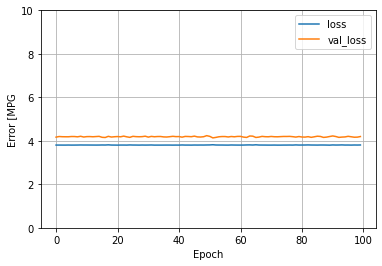

In [68]:
plot_loss(history)

## Collect the results on the test set, for later:

In [69]:
test_results = {}

test_results['hoursepower_model'] = hoursepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

In [70]:
x = tf.linspace(0.0, 250, 251)
y = hoursepower_model.predict(x)

In [71]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Prediction')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

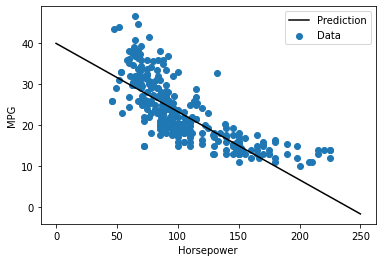

In [72]:
plot_horsepower(x, y)

# DNN regression

In [73]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  
  model.compile(
      loss='mean_absolute_error',
      optimizer=tf.keras.optimizers.Adam(0.001)
  )

  return model



In [75]:
dnn_horsepower_model = build_and_compile_model(hoursepower_normalizer)

In [76]:
dnn_horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [77]:
#train the model
%%time

history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=2, epochs=100
)

Epoch 1/100
8/8 - 1s - loss: 23.1058 - val_loss: 23.4959
Epoch 2/100
8/8 - 0s - loss: 22.8889 - val_loss: 23.2657
Epoch 3/100
8/8 - 0s - loss: 22.6636 - val_loss: 23.0076
Epoch 4/100
8/8 - 0s - loss: 22.3919 - val_loss: 22.6799
Epoch 5/100
8/8 - 0s - loss: 22.0354 - val_loss: 22.2403
Epoch 6/100
8/8 - 0s - loss: 21.5636 - val_loss: 21.6545
Epoch 7/100
8/8 - 0s - loss: 20.9288 - val_loss: 20.9040
Epoch 8/100
8/8 - 0s - loss: 20.1271 - val_loss: 19.9326
Epoch 9/100
8/8 - 0s - loss: 19.0917 - val_loss: 18.7117
Epoch 10/100
8/8 - 0s - loss: 17.8101 - val_loss: 17.1945
Epoch 11/100
8/8 - 0s - loss: 16.2018 - val_loss: 15.3924
Epoch 12/100
8/8 - 0s - loss: 14.3601 - val_loss: 13.2872
Epoch 13/100
8/8 - 0s - loss: 12.2500 - val_loss: 10.9864
Epoch 14/100
8/8 - 0s - loss: 9.9319 - val_loss: 8.7116
Epoch 15/100
8/8 - 0s - loss: 7.2757 - val_loss: 6.6227
Epoch 16/100
8/8 - 0s - loss: 5.0726 - val_loss: 5.2867
Epoch 17/100
8/8 - 0s - loss: 4.3721 - val_loss: 5.4240
Epoch 18/100
8/8 - 0s - loss: 4

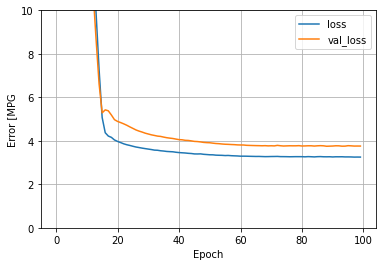

In [78]:
plot_loss(history)

In [79]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

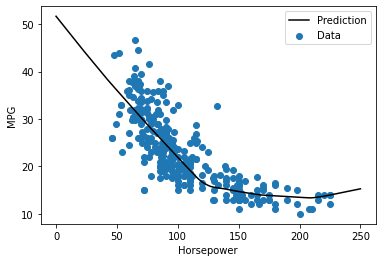

In [80]:
plot_horsepower(x, y)